In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier

%matplotlib inline

In [2]:
from imblearn.over_sampling import SMOTE, ADASYN

In [3]:
d = pd.read_csv('bank_marketing_data_feature_engineered.csv')

In [4]:
d.shape

(41084, 15)

In [5]:
d.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month',
       'deposit', 'age_bucket', 'previous_campaign'],
      dtype='object')

In [10]:
c = ['job', 'marital', 'education', 'housing', 'contact', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month', 'age_bucket']

In [11]:
X = d[c]

In [12]:
X.columns

Index(['job', 'marital', 'education', 'housing', 'contact', 'day_of_week',
       'campaign', 'cons_conf_idx', 'euribor_3_month', 'age_bucket'],
      dtype='object')

In [250]:
y = d.deposit

In [301]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [302]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state = 42, stratify = y)

In [303]:
sm = SMOTE(kind = 'borderline1')
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train.ravel())

In [3]:
##Trying with AdaBoost Classifier model

In [304]:
ad = AdaBoostClassifier(n_estimators=100)

In [305]:
cross_val_score(ad, X_train_resample, y_train_resample, cv = 5)

array([0.75757576, 0.9004914 , 0.89483924, 0.88613557, 0.89473684])

In [306]:
ad.fit(X_train_resample, y_train_resample)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [307]:
ad.score(X_test, y_test)

0.8693760141613808

In [309]:
y_pred1 = ad.predict(X_test)

In [310]:
confusion_matrix(y_test, y_pred1)

array([[10967,  1060],
       [  711,   820]], dtype=int64)

In [311]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     12027
           1       0.44      0.54      0.48      1531

   micro avg       0.87      0.87      0.87     13558
   macro avg       0.69      0.72      0.70     13558
weighted avg       0.88      0.87      0.88     13558



In [312]:
from xgboost import XGBClassifier

In [313]:
xg = XGBClassifier()

In [314]:
xg.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [315]:
xg.score(X_test, y_test)

0.8782268771205193

In [316]:
yhatx = xg.predict(X_test)

In [317]:
confusion_matrix(y_test, yhatx)

array([[11121,   906],
       [  745,   786]], dtype=int64)

In [318]:
print(classification_report(y_test, yhatx))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     12027
           1       0.46      0.51      0.49      1531

   micro avg       0.88      0.88      0.88     13558
   macro avg       0.70      0.72      0.71     13558
weighted avg       0.88      0.88      0.88     13558



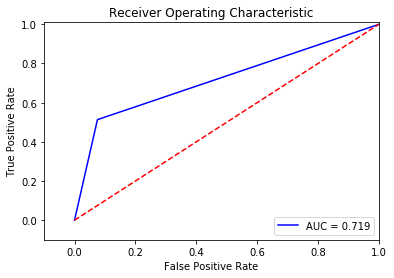

In [319]:
fpr, tpr, thresholds = roc_curve(y_test, yhatx)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## Since I want atleast balance of precision and recall

In [345]:
sm1 = SMOTE(random_state=10)
X_train_resample, y_train_resample = sm1.fit_sample(X_train, y_train)

In [4]:
## Checking the number of Observations after using oversampling technique

In [346]:
print("Number Of Observations X_train dataset: ", X_train.shape)
print("Number Of Observations y_train dataset: ", y_train.shape)
print("Number Of Observations X_test dataset: ", X_test.shape)
print("Number Of Observations y_test dataset: ", y_test.shape)

Number Of Observations X_train dataset:  (27526, 10)
Number Of Observations y_train dataset:  (27526,)
Number Of Observations X_test dataset:  (13558, 10)
Number Of Observations y_test dataset:  (13558,)


In [347]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3109
Before OverSampling, counts of label '0': 24417 



In [229]:
# sm = SMOTE(random_state=2)
# X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train.ravel())

In [348]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_resample.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resample.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample==0)))

After OverSampling, the shape of train_X: (48834, 10)
After OverSampling, the shape of train_y: (48834,) 

After OverSampling, counts of label '1': 24417
After OverSampling, counts of label '0': 24417


In [349]:
xg = XGBClassifier(n_estimators=200)

In [350]:
cross_val_score(xg, X_train_resample, y_train_resample, cv = 5)

array([0.74344799, 0.9498362 , 0.94573008, 0.94654925, 0.9427606 ])

In [351]:
mdl = xg.fit(X_train_resample, y_train_resample)

In [352]:
y_hatx = mdl.predict(X_test)

In [353]:
accuracy_score(y_test, y_hatx)

0.8840536952352854

In [354]:
confusion_matrix(y_test, y_hatx)

array([[11276,   751],
       [  821,   710]], dtype=int64)

In [355]:
print(classification_report(y_test, y_hatx))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12027
           1       0.49      0.46      0.47      1531

   micro avg       0.88      0.88      0.88     13558
   macro avg       0.71      0.70      0.70     13558
weighted avg       0.88      0.88      0.88     13558



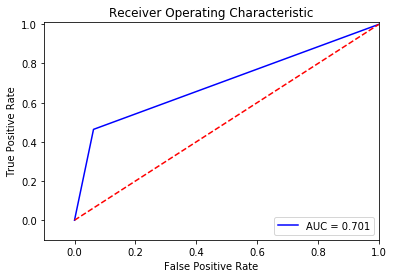

In [356]:
fpr, tpr, thresholds = roc_curve(y_test, y_hatx)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [357]:
sv = LinearSVC(loss = 'hinge', penalty = 'l2')

In [358]:
sv.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [359]:
y_hats = sv.predict(X_test)

In [360]:
sv.score(X_test, y_test)

0.7247381619707921

In [361]:
y_scores = sv.decision_function(X_test)

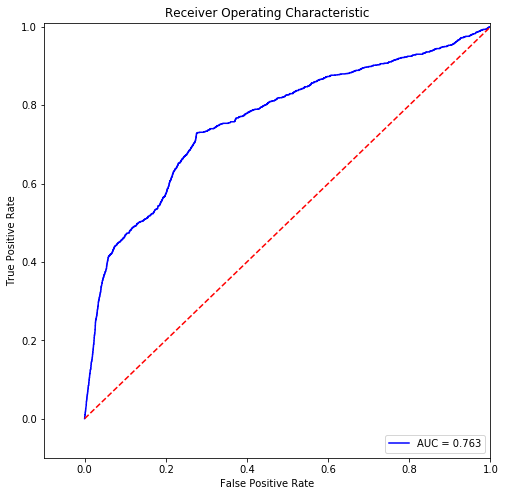

In [362]:
plt.figure(figsize=[8,8])


fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [363]:
adn = ADASYN()

In [364]:
X_train_resample, y_train_resample = adn.fit_sample(X_train, y_train)

In [365]:
X_train_resample.shape

(49734, 10)

In [366]:
sum(y_train_resample ==0)

24417

In [367]:
sum(y_train_resample == 1)

25317

In [5]:
## Playing around with different parametes , using gridsearch as well

In [368]:
xg1 = XGBClassifier(learning_rate=1, n_estimators=100)

In [369]:
xg1.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [370]:
xg1.score(X_test, y_test)

0.8926832866204455

In [371]:
y_pred1 = xg1.predict(X_test)

In [372]:
confusion_matrix(y_test, y_pred1)

array([[11615,   412],
       [ 1043,   488]], dtype=int64)

In [373]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12027
           1       0.54      0.32      0.40      1531

   micro avg       0.89      0.89      0.89     13558
   macro avg       0.73      0.64      0.67     13558
weighted avg       0.88      0.89      0.88     13558



In [15]:
df = pd.read_csv('bank_marketing_for_feature_selection.csv')

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons_conf_idx', 'euribor_3_month', 'deposit', 'age_bucket',
       'previous_campaign'],
      dtype='object')

In [9]:
c = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons_conf_idx', 'euribor_3_month', 'age_bucket']

In [10]:
X = df[c]

In [11]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons_conf_idx', 'euribor_3_month', 'age_bucket'],
      dtype='object')

In [13]:
y = df.deposit

In [14]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state =42, stratify = y)

In [18]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [19]:
cross_val_score(xgb1, X_train, y_train, cv =5)

array([0.89393389, 0.90047221, 0.8924614 , 0.89118983, 0.89026163])

In [21]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [22]:
xgb1.score(X_test, y_test)

0.8983625903525594

In [23]:
y_pred = xgb1.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[11715,   312],
       [ 1066,   465]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12027
           1       0.60      0.30      0.40      1531

   micro avg       0.90      0.90      0.90     13558
   macro avg       0.76      0.64      0.67     13558
weighted avg       0.88      0.90      0.88     13558



In [397]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)


In [27]:
gsearch1.best_score_, gsearch1.best_params_, gsearch1.best_score_

(0.7970750911985622,
 {'max_depth': 3, 'min_child_weight': 1},
 0.7970750911985622)

In [28]:
gsearch1.cv_results_

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([3.07053089, 2.24543481, 2.27356262, 3.60709343, 3.3531785 ,
        3.16708555, 4.93579645, 4.52296271, 4.32633457, 6.17022314,
        5.85321097, 5.14735579]),
 'std_fit_time': array([0.4283908 , 0.03011751, 0.03114745, 0.11106666, 0.05517478,
        0.07608894, 0.13067602, 0.0790066 , 0.05577451, 0.09118839,
        0.08517473, 0.78011229]),
 'mean_score_time': array([0.01956224, 0.01438637, 0.00624843, 0.02499418, 0.01863718,
        0.01917343, 0.03011994, 0.03122206, 0.0299161 , 0.03930206,
        0.03572464, 0.03749061]),
 'std_score_time': array([0.01522544, 0.00153718, 0.00765273, 0.00765312, 0.00385965,
        0.0078728 , 0.00888985, 0.00220068, 0.00795053, 0.00700357,
        0.00416267, 0.00765308]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object

In [29]:
sm = SMOTE(random_state = 2)

In [30]:
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)

In [31]:
X_train.shape

(27526, 16)

In [32]:
X_train_resample.shape

(48834, 16)

In [33]:
y_train_resample.shape


(48834,)

In [34]:
y_train.shape

(27526,)

In [36]:
sum(y_train_resample == 0)

24417

In [38]:
sum(y_train_resample == 1)

24417

In [39]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [40]:
cross_val_score(xgb1, X_train_resample, y_train_resample, cv =5)

array([0.69000819, 0.98085586, 0.98126152, 0.98064714, 0.97880401])

In [41]:
model = xgb1.fit(X_train_resample, y_train_resample)

In [42]:
y_pred = model.predict(X_test)

In [43]:
model.score(X_test, y_test)

0.8987313763091902

In [44]:
confusion_matrix(y_test, y_pred)

array([[11715,   312],
       [ 1061,   470]], dtype=int64)

In [45]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train_resample,y_train_resample)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=2, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [46]:
gsearch.estimator, gsearch.best_params_, gsearch.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=5, min_child_weight=2, missing=None, n_estimators=140,
        n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
        subsample=0.8),
 {'max_depth': 6, 'min_child_weight': 5},
 0.972757495262751)

In [48]:
#setting max depth = 6, min_child_weight =5
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [49]:
model1 = xgb2.fit(X_train_resample, y_train_resample)

In [50]:
y_pred1 = model1.predict(X_test)

In [51]:
model1.feature_importances_

array([0.12659797, 0.04153996, 0.05892947, 0.0170057 , 0.04838948,
       0.02479998, 0.01738951, 0.0618228 , 0.08579611, 0.10274276,
       0.02497712, 0.02580379, 0.00814856, 0.07738183, 0.21853504,
       0.06013994], dtype=float32)

In [52]:
feature_importances = pd.DataFrame(xgb2.feature_importances_,
                                   index = X.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False)

,importance
euribor_3_month,0.218535
job,0.126598
campaign,0.102743
day_of_week,0.085796
cons_conf_idx,0.077382
month,0.061823
age_bucket,0.060140
education,0.058929
housing,0.048389
marital,0.041540


In [54]:
confusion_matrix(y_test, y_pred1)

array([[11674,   353],
       [ 1039,   492]], dtype=int64)

#### The final predictors for the XGBoost Classifier - A model which predicts customers who will subscribe for term deposit - A balanced precision and recall model

In [51]:
c = ['job', 'marital', 'education', 'contact', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month', 'age_bucket']

In [52]:
X = df[c]

In [53]:
y = df.deposit

In [54]:
X.corr()

,job,marital,education,contact,day_of_week,campaign,cons_conf_idx,euribor_3_month,age_bucket
job,1.000000,-0.028510,0.114627,0.025369,-0.005323,-0.006730,0.052774,-0.007832,-0.002773
marital,-0.028510,1.000000,-0.087487,-0.054484,-0.014298,0.008918,0.033771,0.092177,0.378805
education,0.114627,-0.087487,1.000000,0.103535,-0.003627,-0.001559,0.040463,-0.022414,-0.142421
contact,0.025369,-0.054484,0.103535,1.000000,-0.019333,-0.076311,-0.251854,-0.399845,-0.019910
day_of_week,-0.005323,-0.014298,-0.003627,-0.019333,1.000000,0.012647,0.000199,-0.005959,-0.015298
campaign,-0.006730,0.008918,-0.001559,-0.076311,0.012647,1.000000,-0.010535,0.134475,0.006116
cons_conf_idx,0.052774,0.033771,0.040463,-0.251854,0.000199,-0.010535,1.000000,0.278295,0.109113
euribor_3_month,-0.007832,0.092177,-0.022414,-0.399845,-0.005959,0.134475,0.278295,1.000000,0.031426
age_bucket,-0.002773,0.378805,-0.142421,-0.019910,-0.015298,0.006116,0.109113,0.031426,1.000000


In [55]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [56]:
xg = XGBClassifier()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state = 2, stratify = y)

In [58]:
sm = SMOTE(random_state=2)

In [59]:
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)

In [60]:
marketing_model = xg.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [61]:
y_pred = marketing_model.predict(X_test)

In [62]:
marketing_model.score(X_test, y_test)

0.8787431774598023

In [63]:
confusion_matrix(y_test, y_pred)

array([[11117,   910],
       [  734,   797]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     12027
           1       0.47      0.52      0.49      1531

   micro avg       0.88      0.88      0.88     13558
   macro avg       0.70      0.72      0.71     13558
weighted avg       0.88      0.88      0.88     13558



In [65]:
marketing_model.feature_importances_

array([0.08908046, 0.01149425, 0.01867816, 0.03017241, 0.18103448,
       0.20402299, 0.18965517, 0.24568966, 0.03017241], dtype=float32)

In [66]:
feature_importances = pd.DataFrame(xg.feature_importances_,
                                   index = X.columns,
                                    columns=['importance'])
f = feature_importances.sort_values(by='importance', ascending=False)

,importance
euribor_3_month,0.245690
campaign,0.204023
cons_conf_idx,0.189655
day_of_week,0.181034
job,0.089080
contact,0.030172
age_bucket,0.030172
education,0.018678
marital,0.011494


#### Choosing XGBoost Classifier over ADASyn, as XGBoost gives better precision and f1 score when compared to Adasyn

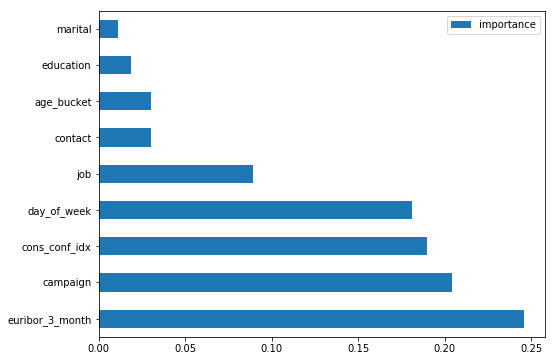

In [68]:
f.plot(kind = 'barh', figsize = (8,6))

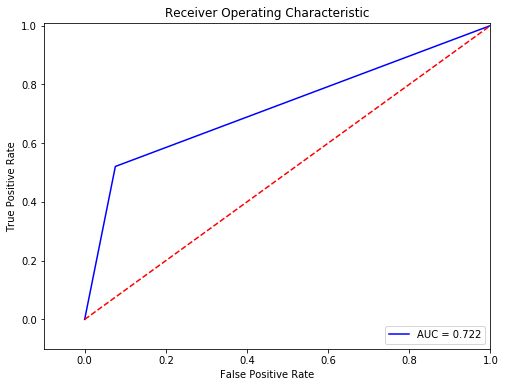

In [69]:
plt.figure(figsize=[8,6])


fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
accuracy_score(y_test, y_pred)

0.8787431774598023

In [71]:
marketing_model.predict_proba(X_test)

array([[0.8135531 , 0.18644693],
       [0.8938139 , 0.10618611],
       [0.8896819 , 0.11031814],
       ...,
       [0.8453935 , 0.15460652],
       [0.80526876, 0.19473127],
       [0.8550466 , 0.14495344]], dtype=float32)

#### Saving the XGBoost model in pickle - A model which has balanced precision and recall

In [ ]:
import pickle
with open('marketing_model_xgboost.pkl', 'wb') as file:
    pickle.dump(marketing_model, file)

#### Model Which will predict all potential customers with 73% accuracy may have 27% chance of customers who would not subscribe

In [38]:
#Logistic regression
lg = LogisticRegression()

In [39]:
#Training the model with logistic regression
marketing_model2 = lg.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
y_pred_lg = marketing_model2.predict(X_test)

In [41]:
y_score = marketing_model2.decision_function(X_test)

In [42]:
confusion_matrix(y_test, y_pred_lg)

array([[8838, 3189],
       [ 438, 1093]], dtype=int64)

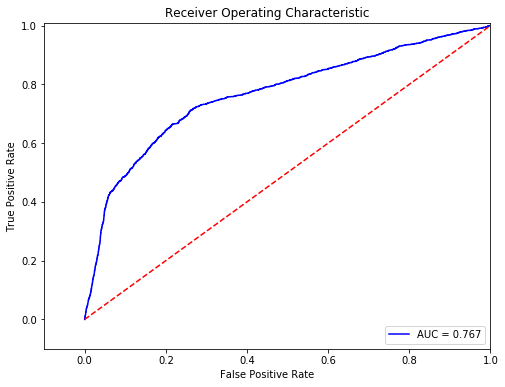

In [43]:
plt.figure(figsize=[8,6])


fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [421]:
marketing_model2.predict_proba(X_test)

array([[0.8135531 , 0.18644693],
       [0.8938139 , 0.10618611],
       [0.8896819 , 0.11031814],
       ...,
       [0.8453935 , 0.15460652],
       [0.80526876, 0.19473127],
       [0.8550466 , 0.14495344]], dtype=float32)

In [44]:
accuracy_score(y_test, y_pred_lg)

0.7324826670600384

In [ ]:
# Saving the Logistic model in pickle
import pickle
with open('marketing_model_logistic.pkl', 'wb') as file:
    pickle.dump(marketing_model2, file)

In [45]:

X.columns 

Index(['job', 'marital', 'education', 'contact', 'day_of_week', 'campaign',
       'cons_conf_idx', 'euribor_3_month', 'age_bucket'],
      dtype='object')

In [2]:
##Saving these features and deposit columns as csv file

In [46]:
dd = df[c]

In [47]:
dd.columns

Index(['job', 'marital', 'education', 'contact', 'day_of_week', 'campaign',
       'cons_conf_idx', 'euribor_3_month', 'age_bucket'],
      dtype='object')

In [48]:
dd['deposit'] = df.deposit

C:\Users\r_ani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
dd.columns

Index(['job', 'marital', 'education', 'contact', 'day_of_week', 'campaign',
       'cons_conf_idx', 'euribor_3_month', 'age_bucket', 'deposit'],
      dtype='object')

In [50]:
dd.shape

(41084, 10)

In [405]:
dd.to_csv('final_predictors_for_xgboost.csv', index = False)

#### Using both XGBoost Classifier model and Logistic regression in the fron end, to get higher Precision and Recall

In [1]:
##app - python file

In [ ]:
import flask
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
# Use pickle to load in the pre-trained model.

with open(f'model/marketing_model_xgboost.pkl', 'rb') as f:
           model = pickle.load(f)
with open(f'model/marketing_model_logistic.pkl', 'rb') as f:
           model_lg = pickle.load(f)
app = flask.Flask(__name__, template_folder='templates')
@app.route('/')
def main():
    return(flask.render_template('index.html'))

@app.route('/result', methods=['GET', 'POST'])
def predict():
    
    if flask.request.method == 'POST':
        job = flask.request.form['job']
        marital = flask.request.form['marital']
        education = flask.request.form['education']
        contact = flask.request.form['contact']
        day_of_week = flask.request.form['day_of_week']
        campaign = flask.request.form['campaign']
        cons_conf_idx = flask.request.form['cons_conf_idx']
        euribor_3_month = flask.request.form['euribor_3_month']
        age_bucket = flask.request.form['age_bucket']
        input_variables = pd.DataFrame([[job, marital, education, contact, day_of_week, campaign, cons_conf_idx, euribor_3_month, age_bucket]],
                                       columns=['job', 'marital', 'education', 'contact', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month', 'age_bucket'], 
                                       dtype = float
                                      )
        print(input_variables)
        ss = joblib.load('model/StandardScalerPickle')
        input_variables_std = ss.transform(input_variables)
        print(input_variables_std * 100)
        result = model.predict(input_variables_std)[0]
        print(result)
        names = flask.request.form['names']
        if result == 1:
            prediction = "Yes, Potential Customer!"
            name = names
        else:
            result = model_lg.predict(input_variables_std)[0]
            if result == 1:
                prediction = " a warm lead"
            else:
                prediction = " Not a potential Customer - Please do not call for current campaign!"
                name = names
        return flask.render_template('result.html', prediction=prediction, name = names)
        
        
if __name__ == '__main__':
    app.run(debug = True)